<a href="https://colab.research.google.com/github/sivakumarsindhu/digit-recg-ognation/blob/main/sindhudigitrecognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


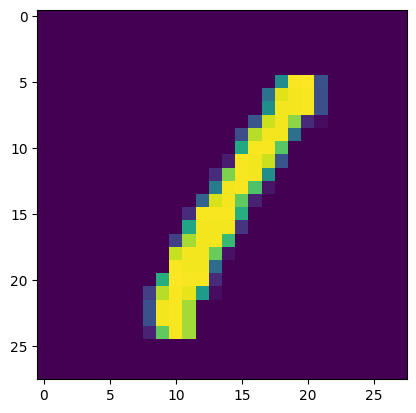

In [4]:
#plot the first image in the dataset
plt.imshow(X_train[3])

In [5]:
#check image shape
X_train[0].shape


(28, 28)

In [6]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
X_train[0].shape

(28, 28, 1)

In [8]:
y_train[3]

1

In [9]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 146s 77ms/step - loss: 0.3537 - accuracy: 0.9473 - val_loss: 0.0973 - val_accuracy: 0.9706
Epoch 2/3
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0767 - accuracy: 0.9764 - val_loss: 0.0863 - val_accuracy: 0.9735
Epoch 3/3
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0532 - accuracy: 0.9830 - val_loss: 0.0723 - val_accuracy: 0.9785


In [13]:
#show predictions for the first 3 images in the test set
model.predict(X_test[:4])

1/1 [==============================] - 0s 244ms/step


array([[1.0432837e-08, 1.1322651e-10, 8.6315248e-09, 6.6829429e-08,
        1.4128299e-10, 6.6471438e-12, 2.7901213e-14, 9.9999964e-01,
        4.5523752e-08, 2.4969538e-07],
       [8.2860199e-09, 8.5908312e-08, 9.9999988e-01, 9.8000108e-10,
        1.6724983e-11, 4.7277823e-13, 8.7037391e-09, 2.0363058e-12,
        1.9902120e-09, 4.2475478e-16],
       [1.6668612e-06, 9.9859053e-01, 1.7829756e-05, 1.4926508e-08,
        7.1509858e-05, 9.9735921e-08, 8.8363537e-05, 1.7870943e-06,
        1.2281835e-03, 1.0127784e-09],
       [9.9996817e-01, 1.7821977e-11, 2.7999968e-05, 6.9706227e-11,
        8.7817522e-09, 5.4271165e-09, 3.3472013e-06, 7.3098398e-09,
        8.0293802e-08, 3.5662407e-07]], dtype=float32)

In [14]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)